In [61]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import math
import copy

import numpy as np
import gym
import gym_keygrid
import pandas as pd

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
from utils import policy_display, states_display, qtable_display, plot_state_freq, plot_scores

### Environment and Optimal Value Function

In [92]:
env = gym.make('keygrid-v2', grid_length=6)
env.render()

KeyGrid2d
| A | * | * | * | * | * | 
| * | * | * | * | * | * | 
| * | * | * | * | * | * | 
| * | * | * | * | * | * | 
| * | * | * | * | K | * | 
| * | * | * | * | * | * | 



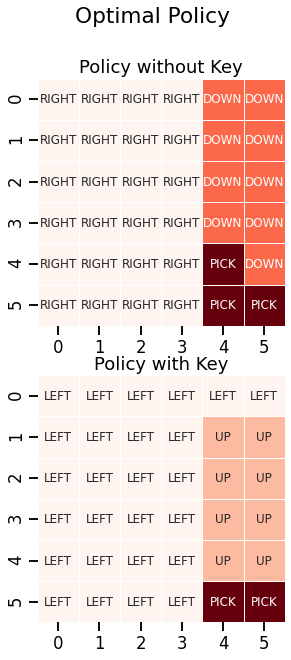

In [93]:
policy_display(env, env.opt_policy, title="Optimal Policy")

### REINFORCE

In [94]:
from reinforce_baseline import train
L = 1300
logs = True

In [95]:
agent = train(env, L, logs=logs)


****************************************************************************************************
TRAINING START


Iteration: 0
(0, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 0, 1) probas:  [0.22 0.19 0.18 0.23 0.19]
(0, 1, 0) probas:  [0.21 0.2  0.2  0.2  0.2 ]
(0, 1, 1) probas:  [0.22 0.19 0.18 0.22 0.19]
(0, 2, 0) probas:  [0.21 0.2  0.19 0.2  0.2 ]
(0, 2, 1) probas:  [0.22 0.19 0.18 0.22 0.2 ]
(0, 3, 0) probas:  [0.22 0.2  0.19 0.2  0.2 ]
(0, 3, 1) probas:  [0.22 0.19 0.18 0.22 0.2 ]
(0, 4, 0) probas:  [0.22 0.2  0.19 0.2  0.2 ]
(0, 4, 1) probas:  [0.23 0.19 0.18 0.21 0.2 ]
(0, 5, 0) probas:  [0.23 0.2  0.18 0.2  0.19]
(0, 5, 1) probas:  [0.23 0.19 0.18 0.21 0.2 ]
(1, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 0, 1) probas:  [0.22 0.19 0.17 0.22 0.19]
(1, 1, 0) probas:  [0.21 0.2  0.19 0.2  0.2 ]
(1, 1, 1) probas:  [0.22 0.19 0.17 0.22 0.2 ]
(1, 2, 0) probas:  [0.21 0.2  0.19 0.2  0.2 ]
(1, 2, 1) probas:  [0.22 0.19 0.17 0.22 0.2 ]
(1, 3, 0) probas:  [0.21 0.2  0.19 0.2  0.2 ]
(1, 

Score: 0
% of visited states: 80.6%

Iteration: 53
Score: 0
% of visited states: 80.6%

Iteration: 54
Score: 0
% of visited states: 80.6%

Iteration: 55
Score: 25
% of visited states: 81.9%

Iteration: 56
Score: 0
% of visited states: 81.9%

Iteration: 57
Score: 0
% of visited states: 81.9%

Iteration: 58
Score: 0
% of visited states: 81.9%

Iteration: 59
Score: 0
% of visited states: 81.9%

Iteration: 60
Score: 0
% of visited states: 81.9%

Iteration: 61
Score: 0
% of visited states: 81.9%

Iteration: 62
Score: 0
% of visited states: 81.9%

Iteration: 63
Score: 0
% of visited states: 81.9%

Iteration: 64
Score: 0
% of visited states: 81.9%

Iteration: 65
Score: 0
% of visited states: 81.9%

Iteration: 66
Score: 0
% of visited states: 81.9%

Iteration: 67
Score: 0
% of visited states: 81.9%

Iteration: 68
Score: 0
% of visited states: 81.9%

Iteration: 69
Score: 0
% of visited states: 81.9%

Iteration: 70
Score: 0
% of visited states: 81.9%

Iteration: 71
Score: 0
% of visited states: 


Iteration: 148
Score: 0
% of visited states: 81.9%

Iteration: 149
Score: 0
% of visited states: 81.9%

Iteration: 150
(0, 0, 0) probas:  [0.18 0.19 0.23 0.21 0.2 ]
(0, 0, 1) probas:  [0.19 0.17 0.21 0.24 0.19]
(0, 1, 0) probas:  [0.18 0.19 0.23 0.21 0.2 ]
(0, 1, 1) probas:  [0.19 0.17 0.21 0.23 0.19]
(0, 2, 0) probas:  [0.18 0.18 0.23 0.21 0.2 ]
(0, 2, 1) probas:  [0.19 0.17 0.22 0.23 0.2 ]
(0, 3, 0) probas:  [0.18 0.18 0.23 0.21 0.2 ]
(0, 3, 1) probas:  [0.19 0.17 0.22 0.23 0.2 ]
(0, 4, 0) probas:  [0.18 0.18 0.24 0.21 0.2 ]
(0, 4, 1) probas:  [0.18 0.17 0.22 0.22 0.2 ]
(0, 5, 0) probas:  [0.18 0.18 0.23 0.21 0.2 ]
(0, 5, 1) probas:  [0.18 0.17 0.23 0.22 0.2 ]
(1, 0, 0) probas:  [0.18 0.18 0.23 0.21 0.2 ]
(1, 0, 1) probas:  [0.18 0.17 0.21 0.24 0.19]
(1, 1, 0) probas:  [0.17 0.18 0.24 0.21 0.2 ]
(1, 1, 1) probas:  [0.18 0.17 0.21 0.23 0.2 ]
(1, 2, 0) probas:  [0.17 0.18 0.24 0.21 0.2 ]
(1, 2, 1) probas:  [0.18 0.17 0.22 0.23 0.2 ]
(1, 3, 0) probas:  [0.17 0.18 0.24 0.21 0.2 ]
(1, 3,


Iteration: 201
Score: 0
% of visited states: 81.9%

Iteration: 202
Score: 0
% of visited states: 81.9%

Iteration: 203
Score: 25
% of visited states: 81.9%

Iteration: 204
Score: 25
% of visited states: 81.9%

Iteration: 205
Score: 0
% of visited states: 81.9%

Iteration: 206
Score: 25
% of visited states: 81.9%

Iteration: 207
Score: 0
% of visited states: 81.9%

Iteration: 208
Score: 0
% of visited states: 81.9%

Iteration: 209
Score: 0
% of visited states: 81.9%

Iteration: 210
Score: 0
% of visited states: 81.9%

Iteration: 211
Score: 0
% of visited states: 81.9%

Iteration: 212
Score: 0
% of visited states: 81.9%

Iteration: 213
Score: 0
% of visited states: 81.9%

Iteration: 214
Score: 25
% of visited states: 83.3%

Iteration: 215
Score: 25
% of visited states: 83.3%

Iteration: 216
Score: 0
% of visited states: 83.3%

Iteration: 217
Score: 0
% of visited states: 83.3%

Iteration: 218
Score: 0
% of visited states: 83.3%

Iteration: 219
Score: 0
% of visited states: 83.3%

Iterat


Iteration: 298
Score: 0
% of visited states: 83.3%

Iteration: 299
Score: 0
% of visited states: 83.3%

Iteration: 300
(0, 0, 0) probas:  [0.16 0.16 0.26 0.22 0.2 ]
(0, 0, 1) probas:  [0.16 0.14 0.26 0.25 0.19]
(0, 1, 0) probas:  [0.15 0.15 0.27 0.22 0.2 ]
(0, 1, 1) probas:  [0.16 0.14 0.26 0.25 0.19]
(0, 2, 0) probas:  [0.15 0.15 0.27 0.22 0.2 ]
(0, 2, 1) probas:  [0.16 0.14 0.26 0.25 0.2 ]
(0, 3, 0) probas:  [0.15 0.14 0.28 0.22 0.2 ]
(0, 3, 1) probas:  [0.15 0.14 0.27 0.24 0.2 ]
(0, 4, 0) probas:  [0.15 0.14 0.28 0.22 0.2 ]
(0, 4, 1) probas:  [0.15 0.14 0.28 0.24 0.2 ]
(0, 5, 0) probas:  [0.15 0.14 0.29 0.22 0.21]
(0, 5, 1) probas:  [0.15 0.13 0.28 0.23 0.2 ]
(1, 0, 0) probas:  [0.15 0.15 0.27 0.23 0.2 ]
(1, 0, 1) probas:  [0.15 0.14 0.26 0.25 0.19]
(1, 1, 0) probas:  [0.15 0.15 0.28 0.23 0.2 ]
(1, 1, 1) probas:  [0.15 0.14 0.26 0.25 0.19]
(1, 2, 0) probas:  [0.14 0.14 0.28 0.23 0.2 ]
(1, 2, 1) probas:  [0.15 0.14 0.27 0.25 0.19]
(1, 3, 0) probas:  [0.14 0.14 0.29 0.23 0.2 ]
(1, 3,


Iteration: 351
Score: 25
% of visited states: 84.7%

Iteration: 352
Score: 25
% of visited states: 84.7%

Iteration: 353
Score: 0
% of visited states: 84.7%

Iteration: 354
Score: 0
% of visited states: 84.7%

Iteration: 355
Score: 25
% of visited states: 84.7%

Iteration: 356
Score: 25
% of visited states: 84.7%

Iteration: 357
Score: 25
% of visited states: 84.7%

Iteration: 358
Score: 0
% of visited states: 84.7%

Iteration: 359
Score: 25
% of visited states: 84.7%

Iteration: 360
Score: 0
% of visited states: 84.7%

Iteration: 361
Score: 25
% of visited states: 84.7%

Iteration: 362
Score: 0
% of visited states: 84.7%

Iteration: 363
Score: 0
% of visited states: 84.7%

Iteration: 364
Score: 25
% of visited states: 84.7%

Iteration: 365
Score: 0
% of visited states: 84.7%

Iteration: 366
Score: 0
% of visited states: 84.7%

Iteration: 367
Score: 25
% of visited states: 84.7%

Iteration: 368
Score: 25
% of visited states: 84.7%

Iteration: 369
Score: 25
% of visited states: 84.7%




Iteration: 446
Score: 0
% of visited states: 84.7%

Iteration: 447
Score: 25
% of visited states: 86.1%

Iteration: 448
Score: 25
% of visited states: 86.1%

Iteration: 449
Score: 25
% of visited states: 86.1%

Iteration: 450
(0, 0, 0) probas:  [0.16 0.14 0.25 0.21 0.24]
(0, 0, 1) probas:  [0.16 0.13 0.24 0.23 0.23]
(0, 1, 0) probas:  [0.15 0.13 0.25 0.21 0.25]
(0, 1, 1) probas:  [0.16 0.13 0.24 0.23 0.24]
(0, 2, 0) probas:  [0.15 0.13 0.26 0.2  0.26]
(0, 2, 1) probas:  [0.16 0.13 0.25 0.22 0.24]
(0, 3, 0) probas:  [0.15 0.13 0.25 0.2  0.27]
(0, 3, 1) probas:  [0.16 0.13 0.25 0.21 0.25]
(0, 4, 0) probas:  [0.15 0.12 0.25 0.19 0.28]
(0, 4, 1) probas:  [0.16 0.12 0.25 0.21 0.26]
(0, 5, 0) probas:  [0.15 0.12 0.25 0.19 0.29]
(0, 5, 1) probas:  [0.16 0.12 0.25 0.2  0.26]
(1, 0, 0) probas:  [0.15 0.13 0.26 0.22 0.24]
(1, 0, 1) probas:  [0.16 0.12 0.25 0.24 0.23]
(1, 1, 0) probas:  [0.15 0.13 0.26 0.21 0.26]
(1, 1, 1) probas:  [0.16 0.12 0.25 0.23 0.24]
(1, 2, 0) probas:  [0.15 0.12 0.25 0.

(5, 0, 0) probas:  [0.15 0.09 0.28 0.22 0.26]
(5, 0, 1) probas:  [0.17 0.09 0.28 0.22 0.24]
(5, 1, 0) probas:  [0.15 0.09 0.28 0.22 0.27]
(5, 1, 1) probas:  [0.17 0.09 0.28 0.21 0.25]
(5, 2, 0) probas:  [0.15 0.09 0.27 0.21 0.29]
(5, 2, 1) probas:  [0.17 0.09 0.28 0.21 0.26]
(5, 3, 0) probas:  [0.15 0.08 0.26 0.2  0.31]
(5, 3, 1) probas:  [0.17 0.09 0.27 0.2  0.27]
(5, 4, 0) probas:  [0.15 0.08 0.26 0.19 0.33]
(5, 4, 1) probas:  [0.17 0.09 0.27 0.19 0.28]
(5, 5, 0) probas:  [0.15 0.08 0.25 0.18 0.34]
(5, 5, 1) probas:  [0.17 0.09 0.27 0.19 0.29]
Score: 25
% of visited states: 86.1%

Iteration: 501
Score: 0
% of visited states: 86.1%

Iteration: 502
Score: 0
% of visited states: 86.1%

Iteration: 503
Score: 0
% of visited states: 86.1%

Iteration: 504
Score: 0
% of visited states: 86.1%

Iteration: 505
Score: 0
% of visited states: 86.1%

Iteration: 506
Score: 0
% of visited states: 86.1%

Iteration: 507
Score: 0
% of visited states: 86.1%

Iteration: 508
Score: 0
% of visited states: 8

Score: 0
% of visited states: 86.1%

Iteration: 585
Score: 25
% of visited states: 86.1%

Iteration: 586
Score: 0
% of visited states: 86.1%

Iteration: 587
Score: 0
% of visited states: 86.1%

Iteration: 588
Score: 25
% of visited states: 86.1%

Iteration: 589
Score: 0
% of visited states: 86.1%

Iteration: 590
Score: 0
% of visited states: 86.1%

Iteration: 591
Score: 0
% of visited states: 86.1%

Iteration: 592
Score: 25
% of visited states: 87.5%

Iteration: 593
Score: 0
% of visited states: 87.5%

Iteration: 594
Score: 25
% of visited states: 87.5%

Iteration: 595
Score: 25
% of visited states: 87.5%

Iteration: 596
Score: 25
% of visited states: 87.5%

Iteration: 597
Score: 0
% of visited states: 87.5%

Iteration: 598
Score: 0
% of visited states: 87.5%

Iteration: 599
Score: 25
% of visited states: 87.5%

Iteration: 600
(0, 0, 0) probas:  [0.15 0.11 0.26 0.21 0.26]
(0, 0, 1) probas:  [0.17 0.11 0.24 0.22 0.26]
(0, 1, 0) probas:  [0.15 0.11 0.26 0.2  0.28]
(0, 1, 1) probas:  [0.1


Iteration: 652
Score: 25
% of visited states: 87.5%

Iteration: 653
Score: 0
% of visited states: 87.5%

Iteration: 654
Score: 0
% of visited states: 87.5%

Iteration: 655
Score: 0
% of visited states: 87.5%

Iteration: 656
Score: 25
% of visited states: 87.5%

Iteration: 657
Score: 0
% of visited states: 87.5%

Iteration: 658
Score: 0
% of visited states: 87.5%

Iteration: 659
Score: 0
% of visited states: 87.5%

Iteration: 660
Score: 0
% of visited states: 87.5%

Iteration: 661
Score: 0
% of visited states: 87.5%

Iteration: 662
Score: 25
% of visited states: 87.5%

Iteration: 663
Score: 25
% of visited states: 87.5%

Iteration: 664
Score: 25
% of visited states: 90.3%

Iteration: 665
Score: 25
% of visited states: 90.3%

Iteration: 666
Score: 0
% of visited states: 90.3%

Iteration: 667
Score: 25
% of visited states: 90.3%

Iteration: 668
Score: 25
% of visited states: 90.3%

Iteration: 669
Score: 0
% of visited states: 90.3%

Iteration: 670
Score: 0
% of visited states: 90.3%

Ite


Iteration: 750
(0, 0, 0) probas:  [0.14 0.11 0.27 0.23 0.24]
(0, 0, 1) probas:  [0.16 0.11 0.24 0.24 0.25]
(0, 1, 0) probas:  [0.14 0.11 0.27 0.23 0.25]
(0, 1, 1) probas:  [0.16 0.11 0.24 0.23 0.26]
(0, 2, 0) probas:  [0.14 0.11 0.27 0.22 0.26]
(0, 2, 1) probas:  [0.16 0.11 0.24 0.22 0.26]
(0, 3, 0) probas:  [0.14 0.11 0.27 0.21 0.27]
(0, 3, 1) probas:  [0.16 0.11 0.24 0.21 0.27]
(0, 4, 0) probas:  [0.14 0.11 0.27 0.2  0.28]
(0, 4, 1) probas:  [0.16 0.11 0.24 0.21 0.28]
(0, 5, 0) probas:  [0.14 0.1  0.27 0.2  0.29]
(0, 5, 1) probas:  [0.16 0.11 0.24 0.2  0.29]
(1, 0, 0) probas:  [0.14 0.11 0.26 0.24 0.25]
(1, 0, 1) probas:  [0.16 0.11 0.24 0.25 0.25]
(1, 1, 0) probas:  [0.14 0.11 0.26 0.23 0.26]
(1, 1, 1) probas:  [0.16 0.11 0.24 0.24 0.26]
(1, 2, 0) probas:  [0.13 0.11 0.27 0.22 0.28]
(1, 2, 1) probas:  [0.16 0.11 0.24 0.22 0.27]
(1, 3, 0) probas:  [0.13 0.1  0.26 0.21 0.29]
(1, 3, 1) probas:  [0.16 0.11 0.24 0.21 0.28]
(1, 4, 0) probas:  [0.13 0.1  0.26 0.2  0.3 ]
(1, 4, 1) probas: 


Iteration: 801
Score: 25
% of visited states: 91.7%

Iteration: 802
Score: 25
% of visited states: 91.7%

Iteration: 803
Score: 25
% of visited states: 93.1%

Iteration: 804
Score: 0
% of visited states: 93.1%

Iteration: 805
Score: 0
% of visited states: 93.1%

Iteration: 806
Score: 0
% of visited states: 93.1%

Iteration: 807
Score: 0
% of visited states: 93.1%

Iteration: 808
Score: 0
% of visited states: 93.1%

Iteration: 809
Score: 0
% of visited states: 93.1%

Iteration: 810
Score: 0
% of visited states: 93.1%

Iteration: 811
Score: 25
% of visited states: 93.1%

Iteration: 812
Score: 25
% of visited states: 93.1%

Iteration: 813
Score: 25
% of visited states: 93.1%

Iteration: 814
Score: 25
% of visited states: 93.1%

Iteration: 815
Score: 0
% of visited states: 93.1%

Iteration: 816
Score: 0
% of visited states: 93.1%

Iteration: 817
Score: 25
% of visited states: 93.1%

Iteration: 818
Score: 0
% of visited states: 93.1%

Iteration: 819
Score: 25
% of visited states: 93.1%

It

Score: 0
% of visited states: 93.1%

Iteration: 897
Score: 0
% of visited states: 93.1%

Iteration: 898
Score: 25
% of visited states: 93.1%

Iteration: 899
Score: 0
% of visited states: 93.1%

Iteration: 900
(0, 0, 0) probas:  [0.14 0.11 0.31 0.23 0.21]
(0, 0, 1) probas:  [0.15 0.1  0.31 0.23 0.21]
(0, 1, 0) probas:  [0.13 0.11 0.32 0.22 0.22]
(0, 1, 1) probas:  [0.15 0.1  0.32 0.22 0.22]
(0, 2, 0) probas:  [0.13 0.1  0.33 0.21 0.22]
(0, 2, 1) probas:  [0.15 0.1  0.32 0.21 0.22]
(0, 3, 0) probas:  [0.13 0.1  0.34 0.2  0.23]
(0, 3, 1) probas:  [0.15 0.1  0.33 0.19 0.23]
(0, 4, 0) probas:  [0.13 0.1  0.35 0.19 0.23]
(0, 4, 1) probas:  [0.15 0.1  0.34 0.18 0.23]
(0, 5, 0) probas:  [0.13 0.1  0.35 0.18 0.24]
(0, 5, 1) probas:  [0.15 0.1  0.34 0.18 0.24]
(1, 0, 0) probas:  [0.14 0.1  0.31 0.24 0.22]
(1, 0, 1) probas:  [0.15 0.1  0.31 0.23 0.21]
(1, 1, 0) probas:  [0.13 0.1  0.32 0.23 0.22]
(1, 1, 1) probas:  [0.15 0.1  0.32 0.22 0.22]
(1, 2, 0) probas:  [0.13 0.1  0.33 0.21 0.23]
(1, 2, 1)


Iteration: 952
Score: 0
% of visited states: 93.1%

Iteration: 953
Score: 0
% of visited states: 93.1%

Iteration: 954
Score: 25
% of visited states: 93.1%

Iteration: 955
Score: 0
% of visited states: 93.1%

Iteration: 956
Score: 0
% of visited states: 93.1%

Iteration: 957
Score: 0
% of visited states: 93.1%

Iteration: 958
Score: 25
% of visited states: 93.1%

Iteration: 959
Score: 0
% of visited states: 93.1%

Iteration: 960
Score: 0
% of visited states: 93.1%

Iteration: 961
Score: 0
% of visited states: 93.1%

Iteration: 962
Score: 0
% of visited states: 93.1%

Iteration: 963
Score: 25
% of visited states: 93.1%

Iteration: 964
Score: 0
% of visited states: 93.1%

Iteration: 965
Score: 25
% of visited states: 93.1%

Iteration: 966
Score: 25
% of visited states: 93.1%

Iteration: 967
Score: 0
% of visited states: 93.1%

Iteration: 968
Score: 0
% of visited states: 93.1%

Iteration: 969
Score: 0
% of visited states: 93.1%

Iteration: 970
Score: 0
% of visited states: 93.1%

Iterat


Iteration: 1050
(0, 0, 0) probas:  [0.11 0.1  0.27 0.25 0.27]
(0, 0, 1) probas:  [0.12 0.09 0.25 0.25 0.29]
(0, 1, 0) probas:  [0.11 0.1  0.27 0.24 0.28]
(0, 1, 1) probas:  [0.12 0.1  0.25 0.23 0.3 ]
(0, 2, 0) probas:  [0.11 0.1  0.27 0.22 0.3 ]
(0, 2, 1) probas:  [0.12 0.1  0.25 0.22 0.31]
(0, 3, 0) probas:  [0.11 0.1  0.27 0.21 0.31]
(0, 3, 1) probas:  [0.12 0.1  0.26 0.2  0.32]
(0, 4, 0) probas:  [0.11 0.1  0.27 0.19 0.33]
(0, 4, 1) probas:  [0.12 0.1  0.26 0.19 0.34]
(0, 5, 0) probas:  [0.11 0.1  0.26 0.18 0.35]
(0, 5, 1) probas:  [0.12 0.1  0.25 0.18 0.35]
(1, 0, 0) probas:  [0.11 0.09 0.25 0.26 0.28]
(1, 0, 1) probas:  [0.12 0.09 0.24 0.25 0.3 ]
(1, 1, 0) probas:  [0.11 0.1  0.25 0.25 0.3 ]
(1, 1, 1) probas:  [0.12 0.09 0.24 0.23 0.32]
(1, 2, 0) probas:  [0.11 0.1  0.25 0.22 0.32]
(1, 2, 1) probas:  [0.12 0.09 0.24 0.22 0.33]
(1, 3, 0) probas:  [0.11 0.1  0.25 0.2  0.33]
(1, 3, 1) probas:  [0.12 0.09 0.25 0.2  0.34]
(1, 4, 0) probas:  [0.1  0.1  0.25 0.19 0.35]
(1, 4, 1) probas:


Iteration: 1101
Score: 25
% of visited states: 94.4%

Iteration: 1102
Score: 25
% of visited states: 94.4%

Iteration: 1103
Score: 0
% of visited states: 94.4%

Iteration: 1104
Score: 25
% of visited states: 94.4%

Iteration: 1105
Score: 25
% of visited states: 94.4%

Iteration: 1106
Score: 0
% of visited states: 94.4%

Iteration: 1107
Score: 25
% of visited states: 94.4%

Iteration: 1108
Score: 0
% of visited states: 94.4%

Iteration: 1109
Score: 25
% of visited states: 94.4%

Iteration: 1110
Score: 0
% of visited states: 94.4%

Iteration: 1111
Score: 0
% of visited states: 94.4%

Iteration: 1112
Score: 25
% of visited states: 94.4%

Iteration: 1113
Score: 0
% of visited states: 94.4%

Iteration: 1114
Score: 25
% of visited states: 94.4%

Iteration: 1115
Score: 25
% of visited states: 94.4%

Iteration: 1116
Score: 0
% of visited states: 94.4%

Iteration: 1117
Score: 25
% of visited states: 94.4%

Iteration: 1118
Score: 0
% of visited states: 94.4%

Iteration: 1119
Score: 25
% of visi

Score: 0
% of visited states: 94.4%

Iteration: 1196
Score: 0
% of visited states: 94.4%

Iteration: 1197
Score: 25
% of visited states: 94.4%

Iteration: 1198
Score: 0
% of visited states: 94.4%

Iteration: 1199
Score: 0
% of visited states: 94.4%

Iteration: 1200
(0, 0, 0) probas:  [0.12 0.11 0.28 0.25 0.25]
(0, 0, 1) probas:  [0.13 0.11 0.27 0.24 0.25]
(0, 1, 0) probas:  [0.12 0.11 0.29 0.23 0.25]
(0, 1, 1) probas:  [0.13 0.11 0.28 0.22 0.25]
(0, 2, 0) probas:  [0.12 0.11 0.3  0.21 0.26]
(0, 2, 1) probas:  [0.13 0.11 0.29 0.21 0.26]
(0, 3, 0) probas:  [0.12 0.12 0.31 0.19 0.27]
(0, 3, 1) probas:  [0.14 0.12 0.3  0.19 0.26]
(0, 4, 0) probas:  [0.12 0.12 0.31 0.18 0.28]
(0, 4, 1) probas:  [0.14 0.12 0.3  0.17 0.27]
(0, 5, 0) probas:  [0.12 0.12 0.31 0.17 0.29]
(0, 5, 1) probas:  [0.14 0.13 0.31 0.16 0.27]
(1, 0, 0) probas:  [0.12 0.1  0.27 0.26 0.25]
(1, 0, 1) probas:  [0.13 0.1  0.27 0.24 0.25]
(1, 1, 0) probas:  [0.12 0.1  0.28 0.24 0.26]
(1, 1, 1) probas:  [0.13 0.11 0.27 0.22 0.26


Iteration: 1251
Score: 25
% of visited states: 94.4%

Iteration: 1252
Score: 25
% of visited states: 94.4%

Iteration: 1253
Score: 25
% of visited states: 94.4%

Iteration: 1254
Score: 0
% of visited states: 94.4%

Iteration: 1255
Score: 25
% of visited states: 94.4%

Iteration: 1256
Score: 25
% of visited states: 94.4%

Iteration: 1257
Score: 25
% of visited states: 94.4%

Iteration: 1258
Score: 0
% of visited states: 94.4%

Iteration: 1259
Score: 25
% of visited states: 94.4%

Iteration: 1260
Score: 0
% of visited states: 94.4%

Iteration: 1261
Score: 0
% of visited states: 94.4%

Iteration: 1262
Score: 0
% of visited states: 94.4%

Iteration: 1263
Score: 0
% of visited states: 94.4%

Iteration: 1264
Score: 25
% of visited states: 94.4%

Iteration: 1265
Score: 0
% of visited states: 94.4%

Iteration: 1266
Score: 0
% of visited states: 94.4%

Iteration: 1267
Score: 0
% of visited states: 94.4%

Iteration: 1268
Score: 0
% of visited states: 94.4%

Iteration: 1269
Score: 25
% of visite

<Figure size 720x360 with 0 Axes>

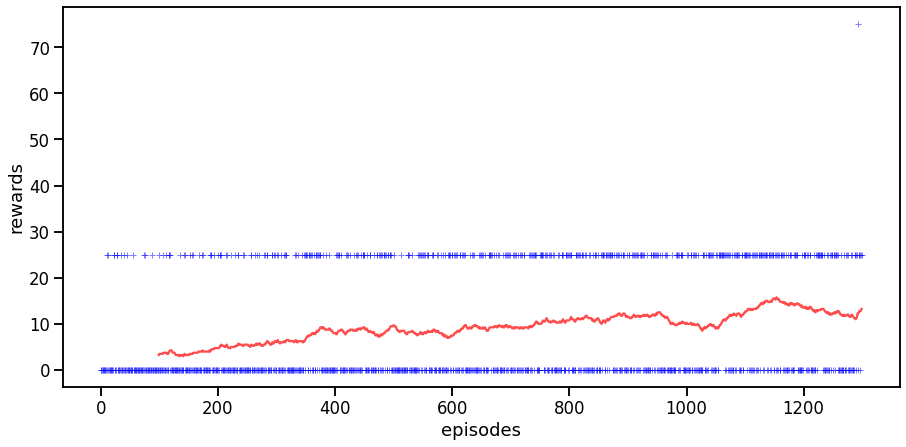

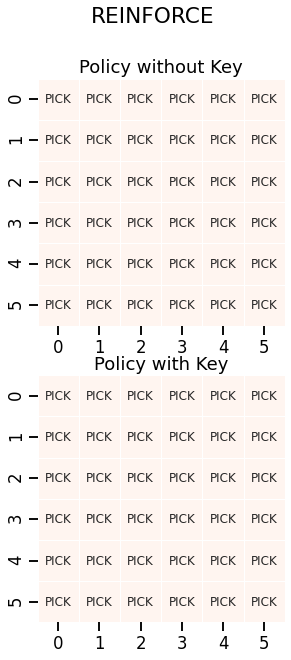

% of visited states: 97.2%


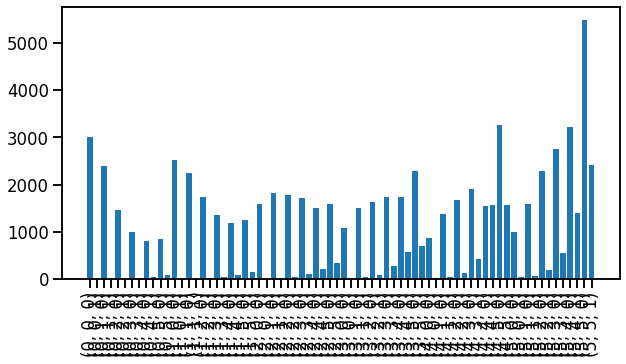

In [96]:
plot_scores(agent.scores)
agent.get_policy()
policy_display(env, agent.policy, "REINFORCE")
plot_state_freq(agent.state_freq)
agent.get_proba()
agent.get_state_freq()

### Reinforce count state exploration

In [97]:
from reinforce_count_states import train

In [98]:
agent = train(env, L, logs=logs)


****************************************************************************************************
TRAINING START


Iteration: 0
(0, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 0, 1) probas:  [0.19 0.2  0.21 0.2  0.19]
(0, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 1, 1) probas:  [0.19 0.2  0.21 0.2  0.19]
(0, 2, 0) probas:  [0.2  0.2  0.21 0.2  0.2 ]
(0, 2, 1) probas:  [0.19 0.2  0.21 0.2  0.2 ]
(0, 3, 0) probas:  [0.19 0.2  0.21 0.2  0.2 ]
(0, 3, 1) probas:  [0.19 0.2  0.22 0.2  0.2 ]
(0, 4, 0) probas:  [0.19 0.2  0.21 0.2  0.2 ]
(0, 4, 1) probas:  [0.19 0.2  0.22 0.19 0.2 ]
(0, 5, 0) probas:  [0.19 0.2  0.22 0.2  0.2 ]
(0, 5, 1) probas:  [0.18 0.2  0.22 0.19 0.2 ]
(1, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 0, 1) probas:  [0.19 0.2  0.21 0.21 0.19]
(1, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 1, 1) probas:  [0.19 0.2  0.21 0.2  0.19]
(1, 2, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 2, 1) probas:  [0.19 0.2  0.21 0.2  0.2 ]
(1, 3, 0) probas:  [0.19 0.2  0.21 0.2  0.2 ]
(1, 3, 1) probas:  

Score: 0
% of visited states: 72.2%

Iteration: 51
Score: 0
% of visited states: 72.2%

Iteration: 52
Score: 0
% of visited states: 76.4%

Iteration: 53
Score: 0
% of visited states: 81.9%

Iteration: 54
Score: 0
% of visited states: 81.9%

Iteration: 55
Score: 0
% of visited states: 81.9%

Iteration: 56
Score: 0
% of visited states: 81.9%

Iteration: 57
Score: 0
% of visited states: 81.9%

Iteration: 58
Score: 0
% of visited states: 81.9%

Iteration: 59
Score: 0
% of visited states: 81.9%

Iteration: 60
Score: 0
% of visited states: 81.9%

Iteration: 61
Score: 0
% of visited states: 81.9%

Iteration: 62
Score: 0
% of visited states: 81.9%

Iteration: 63
Score: 0
% of visited states: 81.9%

Iteration: 64
Score: 0
% of visited states: 81.9%

Iteration: 65
Score: 0
% of visited states: 81.9%

Iteration: 66
Score: 0
% of visited states: 81.9%

Iteration: 67
Score: 0
% of visited states: 81.9%

Iteration: 68
Score: 0
% of visited states: 81.9%

Iteration: 69
Score: 0
% of visited states: 8

Score: 0
% of visited states: 86.1%

Iteration: 147
Score: 0
% of visited states: 86.1%

Iteration: 148
Score: 0
% of visited states: 90.3%

Iteration: 149
Score: 0
% of visited states: 90.3%

Iteration: 150
(0, 0, 0) probas:  [0.17 0.16 0.21 0.23 0.22]
(0, 0, 1) probas:  [0.16 0.16 0.22 0.24 0.22]
(0, 1, 0) probas:  [0.16 0.16 0.22 0.24 0.22]
(0, 1, 1) probas:  [0.16 0.16 0.23 0.24 0.22]
(0, 2, 0) probas:  [0.15 0.15 0.22 0.24 0.23]
(0, 2, 1) probas:  [0.15 0.16 0.23 0.23 0.22]
(0, 3, 0) probas:  [0.15 0.15 0.23 0.24 0.23]
(0, 3, 1) probas:  [0.15 0.16 0.23 0.23 0.23]
(0, 4, 0) probas:  [0.14 0.15 0.23 0.24 0.23]
(0, 4, 1) probas:  [0.14 0.15 0.24 0.23 0.23]
(0, 5, 0) probas:  [0.14 0.15 0.24 0.25 0.23]
(0, 5, 1) probas:  [0.14 0.15 0.24 0.23 0.23]
(1, 0, 0) probas:  [0.16 0.16 0.22 0.24 0.22]
(1, 0, 1) probas:  [0.16 0.16 0.22 0.24 0.22]
(1, 1, 0) probas:  [0.16 0.15 0.22 0.24 0.22]
(1, 1, 1) probas:  [0.16 0.16 0.22 0.24 0.22]
(1, 2, 0) probas:  [0.15 0.15 0.23 0.25 0.23]
(1, 2, 1) 

(5, 1, 0) probas:  [0.14 0.14 0.25 0.24 0.24]
(5, 1, 1) probas:  [0.14 0.14 0.25 0.25 0.23]
(5, 2, 0) probas:  [0.13 0.13 0.25 0.24 0.24]
(5, 2, 1) probas:  [0.13 0.14 0.25 0.24 0.23]
(5, 3, 0) probas:  [0.13 0.13 0.25 0.23 0.25]
(5, 3, 1) probas:  [0.13 0.14 0.26 0.24 0.24]
(5, 4, 0) probas:  [0.13 0.13 0.26 0.23 0.26]
(5, 4, 1) probas:  [0.12 0.14 0.26 0.23 0.24]
(5, 5, 0) probas:  [0.12 0.13 0.26 0.23 0.26]
(5, 5, 1) probas:  [0.12 0.13 0.27 0.23 0.25]
Score: 0
% of visited states: 90.3%

Iteration: 201
Score: 0
% of visited states: 90.3%

Iteration: 202
Score: 0
% of visited states: 90.3%

Iteration: 203
Score: 0
% of visited states: 90.3%

Iteration: 204
Score: 0
% of visited states: 90.3%

Iteration: 205
Score: 0
% of visited states: 90.3%

Iteration: 206
Score: 0
% of visited states: 90.3%

Iteration: 207
Score: 0
% of visited states: 90.3%

Iteration: 208
Score: 0
% of visited states: 90.3%

Iteration: 209
Score: 0
% of visited states: 90.3%

Iteration: 210
Score: 0
% of visite


Iteration: 288
Score: 0
% of visited states: 91.7%

Iteration: 289
Score: 0
% of visited states: 91.7%

Iteration: 290
Score: 0
% of visited states: 91.7%

Iteration: 291
Score: 0
% of visited states: 91.7%

Iteration: 292
Score: 0
% of visited states: 91.7%

Iteration: 293
Score: 0
% of visited states: 91.7%

Iteration: 294
Score: 0
% of visited states: 91.7%

Iteration: 295
Score: 0
% of visited states: 91.7%

Iteration: 296
Score: 0
% of visited states: 91.7%

Iteration: 297
Score: 0
% of visited states: 91.7%

Iteration: 298
Score: 0
% of visited states: 91.7%

Iteration: 299
Score: 25
% of visited states: 91.7%

Iteration: 300
(0, 0, 0) probas:  [0.15 0.14 0.22 0.24 0.25]
(0, 0, 1) probas:  [0.14 0.14 0.22 0.24 0.25]
(0, 1, 0) probas:  [0.14 0.14 0.23 0.23 0.26]
(0, 1, 1) probas:  [0.14 0.14 0.23 0.23 0.25]
(0, 2, 0) probas:  [0.14 0.13 0.24 0.23 0.26]
(0, 2, 1) probas:  [0.14 0.14 0.24 0.23 0.26]
(0, 3, 0) probas:  [0.13 0.13 0.25 0.22 0.27]
(0, 3, 1) probas:  [0.13 0.14 0.24 0.

Score: 0
% of visited states: 93.1%

Iteration: 351
Score: 0
% of visited states: 93.1%

Iteration: 352
Score: 0
% of visited states: 93.1%

Iteration: 353
Score: 0
% of visited states: 93.1%

Iteration: 354
Score: 0
% of visited states: 93.1%

Iteration: 355
Score: 0
% of visited states: 93.1%

Iteration: 356
Score: 0
% of visited states: 93.1%

Iteration: 357
Score: 0
% of visited states: 93.1%

Iteration: 358
Score: 0
% of visited states: 93.1%

Iteration: 359
Score: 0
% of visited states: 93.1%

Iteration: 360
Score: 25
% of visited states: 93.1%

Iteration: 361
Score: 0
% of visited states: 93.1%

Iteration: 362
Score: 0
% of visited states: 93.1%

Iteration: 363
Score: 0
% of visited states: 93.1%

Iteration: 364
Score: 0
% of visited states: 93.1%

Iteration: 365
Score: 0
% of visited states: 93.1%

Iteration: 366
Score: 0
% of visited states: 93.1%

Iteration: 367
Score: 0
% of visited states: 93.1%

Iteration: 368
Score: 0
% of visited states: 93.1%

Iteration: 369
Score: 0
% 


Iteration: 445
Score: 0
% of visited states: 93.1%

Iteration: 446
Score: 0
% of visited states: 93.1%

Iteration: 447
Score: 0
% of visited states: 93.1%

Iteration: 448
Score: 0
% of visited states: 93.1%

Iteration: 449
Score: 0
% of visited states: 93.1%

Iteration: 450
(0, 0, 0) probas:  [0.12 0.13 0.2  0.23 0.32]
(0, 0, 1) probas:  [0.11 0.13 0.21 0.24 0.32]
(0, 1, 0) probas:  [0.11 0.12 0.21 0.22 0.34]
(0, 1, 1) probas:  [0.1  0.13 0.21 0.22 0.34]
(0, 2, 0) probas:  [0.1  0.12 0.22 0.21 0.36]
(0, 2, 1) probas:  [0.1  0.12 0.21 0.21 0.35]
(0, 3, 0) probas:  [0.09 0.11 0.22 0.2  0.38]
(0, 3, 1) probas:  [0.09 0.12 0.22 0.2  0.37]
(0, 4, 0) probas:  [0.09 0.11 0.22 0.19 0.4 ]
(0, 4, 1) probas:  [0.09 0.12 0.22 0.19 0.39]
(0, 5, 0) probas:  [0.08 0.11 0.22 0.18 0.41]
(0, 5, 1) probas:  [0.08 0.11 0.22 0.18 0.41]
(1, 0, 0) probas:  [0.11 0.12 0.19 0.23 0.34]
(1, 0, 1) probas:  [0.1  0.12 0.2  0.23 0.34]
(1, 1, 0) probas:  [0.1  0.12 0.2  0.21 0.37]
(1, 1, 1) probas:  [0.1  0.12 0.2 

Score: 0
% of visited states: 93.1%

Iteration: 501
Score: 0
% of visited states: 93.1%

Iteration: 502
Score: 0
% of visited states: 93.1%

Iteration: 503
Score: 0
% of visited states: 93.1%

Iteration: 504
Score: 0
% of visited states: 93.1%

Iteration: 505
Score: 0
% of visited states: 93.1%

Iteration: 506
Score: 0
% of visited states: 93.1%

Iteration: 507
Score: 0
% of visited states: 93.1%

Iteration: 508
Score: 0
% of visited states: 93.1%

Iteration: 509
Score: 0
% of visited states: 93.1%

Iteration: 510
Score: 0
% of visited states: 93.1%

Iteration: 511
Score: 0
% of visited states: 93.1%

Iteration: 512
Score: 0
% of visited states: 93.1%

Iteration: 513
Score: 0
% of visited states: 93.1%

Iteration: 514
Score: 0
% of visited states: 93.1%

Iteration: 515
Score: 0
% of visited states: 93.1%

Iteration: 516
Score: 0
% of visited states: 93.1%

Iteration: 517
Score: 0
% of visited states: 93.1%

Iteration: 518
Score: 0
% of visited states: 93.1%

Iteration: 519
Score: 0
% o

Score: 0
% of visited states: 93.1%

Iteration: 595
Score: 0
% of visited states: 93.1%

Iteration: 596
Score: 0
% of visited states: 93.1%

Iteration: 597
Score: 0
% of visited states: 93.1%

Iteration: 598
Score: 0
% of visited states: 93.1%

Iteration: 599
Score: 0
% of visited states: 93.1%

Iteration: 600
(0, 0, 0) probas:  [0.12 0.11 0.21 0.25 0.31]
(0, 0, 1) probas:  [0.12 0.11 0.21 0.26 0.3 ]
(0, 1, 0) probas:  [0.11 0.11 0.22 0.23 0.33]
(0, 1, 1) probas:  [0.11 0.11 0.22 0.25 0.31]
(0, 2, 0) probas:  [0.1  0.1  0.23 0.22 0.35]
(0, 2, 1) probas:  [0.11 0.11 0.23 0.24 0.32]
(0, 3, 0) probas:  [0.1  0.1  0.23 0.21 0.36]
(0, 3, 1) probas:  [0.1  0.11 0.23 0.22 0.33]
(0, 4, 0) probas:  [0.09 0.09 0.23 0.2  0.38]
(0, 4, 1) probas:  [0.1  0.11 0.24 0.21 0.35]
(0, 5, 0) probas:  [0.09 0.09 0.24 0.19 0.39]
(0, 5, 1) probas:  [0.09 0.1  0.25 0.2  0.36]
(1, 0, 0) probas:  [0.11 0.1  0.2  0.25 0.34]
(1, 0, 1) probas:  [0.11 0.11 0.21 0.26 0.31]
(1, 1, 0) probas:  [0.11 0.1  0.2  0.23 0.36


Iteration: 651
Score: 0
% of visited states: 93.1%

Iteration: 652
Score: 0
% of visited states: 93.1%

Iteration: 653
Score: 0
% of visited states: 93.1%

Iteration: 654
Score: 0
% of visited states: 93.1%

Iteration: 655
Score: 0
% of visited states: 93.1%

Iteration: 656
Score: 0
% of visited states: 93.1%

Iteration: 657
Score: 0
% of visited states: 93.1%

Iteration: 658
Score: 0
% of visited states: 93.1%

Iteration: 659
Score: 0
% of visited states: 93.1%

Iteration: 660
Score: 0
% of visited states: 93.1%

Iteration: 661
Score: 0
% of visited states: 93.1%

Iteration: 662
Score: 0
% of visited states: 93.1%

Iteration: 663
Score: 0
% of visited states: 93.1%

Iteration: 664
Score: 0
% of visited states: 93.1%

Iteration: 665
Score: 0
% of visited states: 93.1%

Iteration: 666
Score: 0
% of visited states: 93.1%

Iteration: 667
Score: 0
% of visited states: 93.1%

Iteration: 668
Score: 0
% of visited states: 93.1%

Iteration: 669
Score: 0
% of visited states: 93.1%

Iteration: 

Score: 0
% of visited states: 94.4%

Iteration: 746
Score: 0
% of visited states: 94.4%

Iteration: 747
Score: 0
% of visited states: 94.4%

Iteration: 748
Score: 0
% of visited states: 94.4%

Iteration: 749
Score: 0
% of visited states: 94.4%

Iteration: 750
(0, 0, 0) probas:  [0.1  0.11 0.23 0.31 0.25]
(0, 0, 1) probas:  [0.09 0.1  0.23 0.32 0.25]
(0, 1, 0) probas:  [0.1  0.11 0.25 0.3  0.26]
(0, 1, 1) probas:  [0.09 0.1  0.24 0.31 0.25]
(0, 2, 0) probas:  [0.09 0.1  0.26 0.29 0.26]
(0, 2, 1) probas:  [0.09 0.1  0.25 0.3  0.25]
(0, 3, 0) probas:  [0.09 0.1  0.27 0.28 0.26]
(0, 3, 1) probas:  [0.08 0.1  0.27 0.29 0.26]
(0, 4, 0) probas:  [0.08 0.1  0.29 0.27 0.27]
(0, 4, 1) probas:  [0.08 0.1  0.28 0.28 0.26]
(0, 5, 0) probas:  [0.08 0.1  0.3  0.26 0.27]
(0, 5, 1) probas:  [0.07 0.1  0.3  0.27 0.27]
(1, 0, 0) probas:  [0.1  0.1  0.22 0.32 0.26]
(1, 0, 1) probas:  [0.09 0.1  0.23 0.33 0.25]
(1, 1, 0) probas:  [0.09 0.1  0.23 0.31 0.27]
(1, 1, 1) probas:  [0.09 0.1  0.24 0.32 0.26]
(1, 


Iteration: 801
Score: 0
% of visited states: 94.4%

Iteration: 802
Score: 0
% of visited states: 94.4%

Iteration: 803
Score: 0
% of visited states: 94.4%

Iteration: 804
Score: 0
% of visited states: 94.4%

Iteration: 805
Score: 0
% of visited states: 94.4%

Iteration: 806
Score: 0
% of visited states: 94.4%

Iteration: 807
Score: 0
% of visited states: 94.4%

Iteration: 808
Score: 0
% of visited states: 94.4%

Iteration: 809
Score: 0
% of visited states: 94.4%

Iteration: 810
Score: 0
% of visited states: 94.4%

Iteration: 811
Score: 0
% of visited states: 94.4%

Iteration: 812
Score: 0
% of visited states: 94.4%

Iteration: 813
Score: 0
% of visited states: 94.4%

Iteration: 814
Score: 0
% of visited states: 94.4%

Iteration: 815
Score: 0
% of visited states: 94.4%

Iteration: 816
Score: 0
% of visited states: 94.4%

Iteration: 817
Score: 0
% of visited states: 94.4%

Iteration: 818
Score: 0
% of visited states: 94.4%

Iteration: 819
Score: 0
% of visited states: 94.4%

Iteration: 

Score: 0
% of visited states: 94.4%

Iteration: 896
Score: 0
% of visited states: 94.4%

Iteration: 897
Score: 0
% of visited states: 94.4%

Iteration: 898
Score: 0
% of visited states: 94.4%

Iteration: 899
Score: 0
% of visited states: 94.4%

Iteration: 900
(0, 0, 0) probas:  [0.11 0.1  0.27 0.27 0.25]
(0, 0, 1) probas:  [0.11 0.1  0.28 0.27 0.24]
(0, 1, 0) probas:  [0.11 0.1  0.3  0.25 0.25]
(0, 1, 1) probas:  [0.1  0.1  0.29 0.26 0.24]
(0, 2, 0) probas:  [0.1  0.1  0.32 0.23 0.24]
(0, 2, 1) probas:  [0.1  0.1  0.31 0.24 0.25]
(0, 3, 0) probas:  [0.1  0.1  0.34 0.22 0.24]
(0, 3, 1) probas:  [0.1  0.1  0.33 0.23 0.25]
(0, 4, 0) probas:  [0.09 0.09 0.36 0.21 0.24]
(0, 4, 1) probas:  [0.09 0.1  0.35 0.21 0.25]
(0, 5, 0) probas:  [0.09 0.09 0.37 0.2  0.24]
(0, 5, 1) probas:  [0.09 0.1  0.37 0.2  0.25]
(1, 0, 0) probas:  [0.11 0.1  0.26 0.28 0.26]
(1, 0, 1) probas:  [0.11 0.1  0.27 0.27 0.25]
(1, 1, 0) probas:  [0.11 0.1  0.28 0.26 0.26]
(1, 1, 1) probas:  [0.1  0.1  0.29 0.26 0.25]
(1, 


Iteration: 951
Score: 0
% of visited states: 95.8%

Iteration: 952
Score: 0
% of visited states: 95.8%

Iteration: 953
Score: 0
% of visited states: 95.8%

Iteration: 954
Score: 0
% of visited states: 95.8%

Iteration: 955
Score: 0
% of visited states: 95.8%

Iteration: 956
Score: 0
% of visited states: 95.8%

Iteration: 957
Score: 0
% of visited states: 95.8%

Iteration: 958
Score: 0
% of visited states: 95.8%

Iteration: 959
Score: 0
% of visited states: 95.8%

Iteration: 960
Score: 0
% of visited states: 95.8%

Iteration: 961
Score: 0
% of visited states: 95.8%

Iteration: 962
Score: 0
% of visited states: 95.8%

Iteration: 963
Score: 0
% of visited states: 95.8%

Iteration: 964
Score: 0
% of visited states: 95.8%

Iteration: 965
Score: 0
% of visited states: 95.8%

Iteration: 966
Score: 0
% of visited states: 95.8%

Iteration: 967
Score: 0
% of visited states: 95.8%

Iteration: 968
Score: 0
% of visited states: 95.8%

Iteration: 969
Score: 0
% of visited states: 95.8%

Iteration: 

Score: 0
% of visited states: 95.8%

Iteration: 1045
Score: 0
% of visited states: 95.8%

Iteration: 1046
Score: 0
% of visited states: 95.8%

Iteration: 1047
Score: 0
% of visited states: 95.8%

Iteration: 1048
Score: 0
% of visited states: 95.8%

Iteration: 1049
Score: 0
% of visited states: 95.8%

Iteration: 1050
(0, 0, 0) probas:  [0.12 0.1  0.28 0.27 0.23]
(0, 0, 1) probas:  [0.11 0.1  0.29 0.28 0.22]
(0, 1, 0) probas:  [0.11 0.1  0.31 0.25 0.22]
(0, 1, 1) probas:  [0.11 0.1  0.31 0.26 0.22]
(0, 2, 0) probas:  [0.11 0.1  0.34 0.23 0.22]
(0, 2, 1) probas:  [0.11 0.1  0.33 0.25 0.22]
(0, 3, 0) probas:  [0.11 0.1  0.36 0.22 0.21]
(0, 3, 1) probas:  [0.1  0.1  0.36 0.23 0.21]
(0, 4, 0) probas:  [0.1  0.1  0.38 0.2  0.21]
(0, 4, 1) probas:  [0.1  0.1  0.38 0.21 0.21]
(0, 5, 0) probas:  [0.1  0.1  0.41 0.19 0.21]
(0, 5, 1) probas:  [0.1  0.1  0.4  0.2  0.21]
(1, 0, 0) probas:  [0.12 0.1  0.27 0.28 0.24]
(1, 0, 1) probas:  [0.12 0.09 0.29 0.28 0.22]
(1, 1, 0) probas:  [0.12 0.1  0.29 0.2

Score: 0
% of visited states: 95.8%

Iteration: 1102
Score: 0
% of visited states: 95.8%

Iteration: 1103
Score: 0
% of visited states: 95.8%

Iteration: 1104
Score: 0
% of visited states: 95.8%

Iteration: 1105
Score: 0
% of visited states: 95.8%

Iteration: 1106
Score: 0
% of visited states: 95.8%

Iteration: 1107
Score: 0
% of visited states: 95.8%

Iteration: 1108
Score: 0
% of visited states: 95.8%

Iteration: 1109
Score: 0
% of visited states: 95.8%

Iteration: 1110
Score: 0
% of visited states: 95.8%

Iteration: 1111
Score: 0
% of visited states: 95.8%

Iteration: 1112
Score: 0
% of visited states: 95.8%

Iteration: 1113
Score: 0
% of visited states: 95.8%

Iteration: 1114
Score: 0
% of visited states: 95.8%

Iteration: 1115
Score: 0
% of visited states: 95.8%

Iteration: 1116
Score: 0
% of visited states: 95.8%

Iteration: 1117
Score: 0
% of visited states: 95.8%

Iteration: 1118
Score: 0
% of visited states: 95.8%

Iteration: 1119
Score: 0
% of visited states: 95.8%

Iteration

Score: 0
% of visited states: 95.8%

Iteration: 1195
Score: 0
% of visited states: 95.8%

Iteration: 1196
Score: 0
% of visited states: 95.8%

Iteration: 1197
Score: 0
% of visited states: 95.8%

Iteration: 1198
Score: 0
% of visited states: 95.8%

Iteration: 1199
Score: 0
% of visited states: 95.8%

Iteration: 1200
(0, 0, 0) probas:  [0.1  0.09 0.28 0.27 0.27]
(0, 0, 1) probas:  [0.09 0.09 0.28 0.27 0.27]
(0, 1, 0) probas:  [0.09 0.09 0.3  0.24 0.27]
(0, 1, 1) probas:  [0.09 0.09 0.3  0.25 0.28]
(0, 2, 0) probas:  [0.09 0.09 0.33 0.22 0.28]
(0, 2, 1) probas:  [0.09 0.08 0.32 0.23 0.28]
(0, 3, 0) probas:  [0.08 0.09 0.34 0.2  0.29]
(0, 3, 1) probas:  [0.08 0.08 0.34 0.21 0.29]
(0, 4, 0) probas:  [0.08 0.09 0.35 0.18 0.29]
(0, 4, 1) probas:  [0.08 0.08 0.35 0.19 0.29]
(0, 5, 0) probas:  [0.08 0.09 0.37 0.17 0.3 ]
(0, 5, 1) probas:  [0.08 0.08 0.37 0.17 0.3 ]
(1, 0, 0) probas:  [0.1  0.09 0.25 0.28 0.29]
(1, 0, 1) probas:  [0.09 0.08 0.27 0.27 0.28]
(1, 1, 0) probas:  [0.1  0.08 0.27 0.2

Score: 0
% of visited states: 95.8%

Iteration: 1251
Score: 0
% of visited states: 95.8%

Iteration: 1252
Score: 0
% of visited states: 95.8%

Iteration: 1253
Score: 0
% of visited states: 95.8%

Iteration: 1254
Score: 0
% of visited states: 95.8%

Iteration: 1255
Score: 0
% of visited states: 95.8%

Iteration: 1256
Score: 0
% of visited states: 95.8%

Iteration: 1257
Score: 0
% of visited states: 95.8%

Iteration: 1258
Score: 0
% of visited states: 95.8%

Iteration: 1259
Score: 0
% of visited states: 95.8%

Iteration: 1260
Score: 0
% of visited states: 95.8%

Iteration: 1261
Score: 0
% of visited states: 95.8%

Iteration: 1262
Score: 0
% of visited states: 95.8%

Iteration: 1263
Score: 0
% of visited states: 95.8%

Iteration: 1264
Score: 0
% of visited states: 95.8%

Iteration: 1265
Score: 0
% of visited states: 95.8%

Iteration: 1266
Score: 0
% of visited states: 95.8%

Iteration: 1267
Score: 0
% of visited states: 95.8%

Iteration: 1268
Score: 0
% of visited states: 95.8%

Iteration

<Figure size 720x360 with 0 Axes>

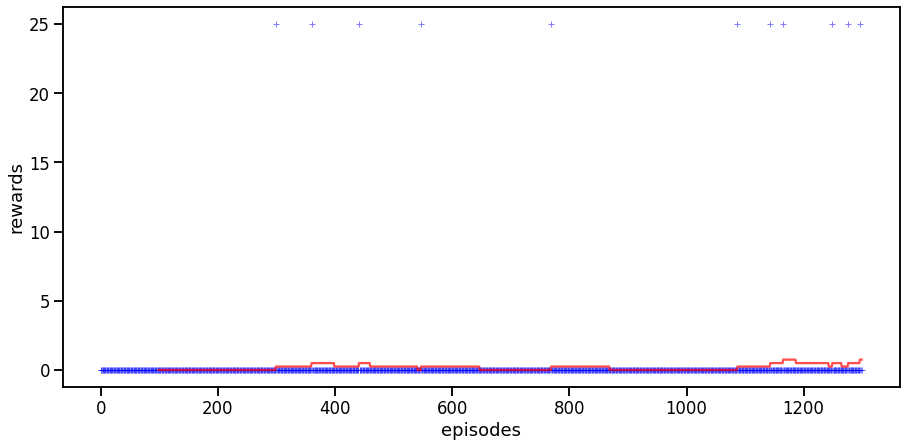

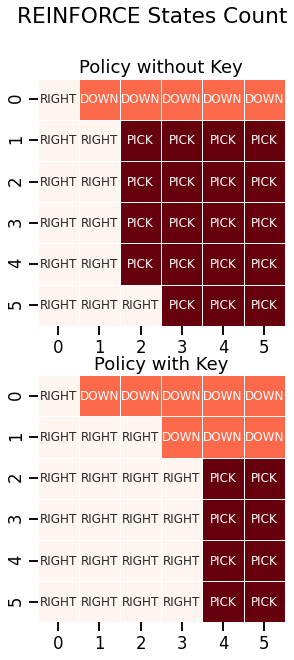

% of visited states: 95.8%


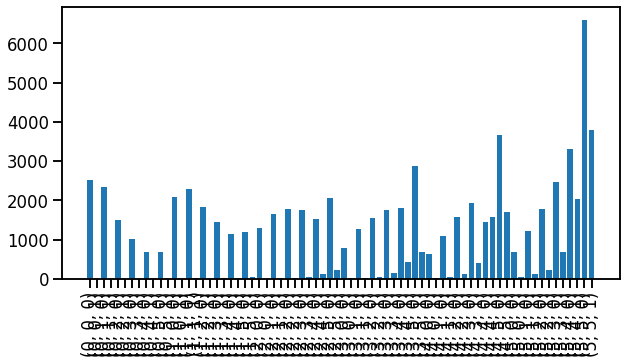

In [99]:
plot_scores(agent.scores)
agent.get_policy()
policy_display(env, agent.policy, "REINFORCE States Count")
plot_state_freq(agent.state_freq)
agent.get_proba()
agent.get_state_freq()

### Reinforce count seq exploration

In [100]:
from reinforce_count_seq import train

In [101]:
agent = train(env, L, logs=logs)


****************************************************************************************************
TRAINING START


Iteration: 0
(0, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 0, 1) probas:  [0.2  0.2  0.19 0.2  0.21]
(0, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 1, 1) probas:  [0.2  0.19 0.19 0.2  0.21]
(0, 2, 0) probas:  [0.2  0.19 0.2  0.21 0.2 ]
(0, 2, 1) probas:  [0.2  0.19 0.19 0.21 0.21]
(0, 3, 0) probas:  [0.2  0.19 0.2  0.21 0.21]
(0, 3, 1) probas:  [0.2  0.19 0.19 0.21 0.21]
(0, 4, 0) probas:  [0.2  0.19 0.2  0.21 0.21]
(0, 4, 1) probas:  [0.2  0.19 0.19 0.21 0.21]
(0, 5, 0) probas:  [0.2  0.18 0.2  0.22 0.21]
(0, 5, 1) probas:  [0.2  0.18 0.19 0.21 0.21]
(1, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 0, 1) probas:  [0.2  0.2  0.19 0.2  0.21]
(1, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 1, 1) probas:  [0.2  0.2  0.19 0.2  0.21]
(1, 2, 0) probas:  [0.2  0.19 0.2  0.21 0.2 ]
(1, 2, 1) probas:  [0.2  0.19 0.19 0.2  0.21]
(1, 3, 0) probas:  [0.2  0.19 0.2  0.21 0.2 ]
(1, 3, 1) prob

Score: 0
% of visited states: 87.5%

Iteration: 51
Score: 0
% of visited states: 87.5%

Iteration: 52
Score: 0
% of visited states: 87.5%

Iteration: 53
Score: 0
% of visited states: 87.5%

Iteration: 54
Score: 0
% of visited states: 87.5%

Iteration: 55
Score: 0
% of visited states: 87.5%

Iteration: 56
Score: 0
% of visited states: 87.5%

Iteration: 57
Score: 0
% of visited states: 87.5%

Iteration: 58
Score: 0
% of visited states: 87.5%

Iteration: 59
Score: 0
% of visited states: 87.5%

Iteration: 60
Score: 0
% of visited states: 87.5%

Iteration: 61
Score: 25
% of visited states: 87.5%

Iteration: 62
Score: 0
% of visited states: 87.5%

Iteration: 63
Score: 25
% of visited states: 87.5%

Iteration: 64
Score: 25
% of visited states: 87.5%

Iteration: 65
Score: 0
% of visited states: 87.5%

Iteration: 66
Score: 0
% of visited states: 87.5%

Iteration: 67
Score: 0
% of visited states: 87.5%

Iteration: 68
Score: 0
% of visited states: 87.5%

Iteration: 69
Score: 0
% of visited states

Score: 0
% of visited states: 93.1%

Iteration: 147
Score: 0
% of visited states: 93.1%

Iteration: 148
Score: 0
% of visited states: 93.1%

Iteration: 149
Score: 0
% of visited states: 93.1%

Iteration: 150
(0, 0, 0) probas:  [0.16 0.19 0.22 0.22 0.2 ]
(0, 0, 1) probas:  [0.17 0.18 0.22 0.22 0.21]
(0, 1, 0) probas:  [0.16 0.19 0.23 0.22 0.21]
(0, 1, 1) probas:  [0.17 0.18 0.22 0.22 0.21]
(0, 2, 0) probas:  [0.15 0.19 0.23 0.22 0.21]
(0, 2, 1) probas:  [0.17 0.18 0.22 0.22 0.21]
(0, 3, 0) probas:  [0.15 0.18 0.23 0.22 0.22]
(0, 3, 1) probas:  [0.17 0.17 0.22 0.22 0.21]
(0, 4, 0) probas:  [0.15 0.18 0.23 0.22 0.22]
(0, 4, 1) probas:  [0.16 0.17 0.22 0.23 0.22]
(0, 5, 0) probas:  [0.15 0.18 0.23 0.22 0.22]
(0, 5, 1) probas:  [0.16 0.17 0.22 0.23 0.22]
(1, 0, 0) probas:  [0.16 0.19 0.22 0.23 0.19]
(1, 0, 1) probas:  [0.17 0.18 0.22 0.23 0.21]
(1, 1, 0) probas:  [0.16 0.19 0.22 0.23 0.2 ]
(1, 1, 1) probas:  [0.17 0.18 0.22 0.22 0.21]
(1, 2, 0) probas:  [0.15 0.19 0.23 0.22 0.21]
(1, 2, 1) 

Score: 0
% of visited states: 95.8%

Iteration: 201
Score: 0
% of visited states: 95.8%

Iteration: 202
Score: 0
% of visited states: 95.8%

Iteration: 203
Score: 0
% of visited states: 95.8%

Iteration: 204
Score: 0
% of visited states: 95.8%

Iteration: 205
Score: 0
% of visited states: 95.8%

Iteration: 206
Score: 0
% of visited states: 95.8%

Iteration: 207
Score: 0
% of visited states: 95.8%

Iteration: 208
Score: 0
% of visited states: 95.8%

Iteration: 209
Score: 0
% of visited states: 95.8%

Iteration: 210
Score: 0
% of visited states: 95.8%

Iteration: 211
Score: 0
% of visited states: 95.8%

Iteration: 212
Score: 0
% of visited states: 95.8%

Iteration: 213
Score: 0
% of visited states: 95.8%

Iteration: 214
Score: 25
% of visited states: 95.8%

Iteration: 215
Score: 0
% of visited states: 95.8%

Iteration: 216
Score: 0
% of visited states: 95.8%

Iteration: 217
Score: 25
% of visited states: 95.8%

Iteration: 218
Score: 0
% of visited states: 95.8%

Iteration: 219
Score: 0
%


Iteration: 295
Score: 0
% of visited states: 97.2%

Iteration: 296
Score: 0
% of visited states: 97.2%

Iteration: 297
Score: 25
% of visited states: 97.2%

Iteration: 298
Score: 0
% of visited states: 97.2%

Iteration: 299
Score: 25
% of visited states: 97.2%

Iteration: 300
(0, 0, 0) probas:  [0.17 0.13 0.26 0.22 0.21]
(0, 0, 1) probas:  [0.19 0.13 0.27 0.2  0.21]
(0, 1, 0) probas:  [0.17 0.13 0.27 0.22 0.21]
(0, 1, 1) probas:  [0.19 0.13 0.27 0.2  0.21]
(0, 2, 0) probas:  [0.17 0.13 0.28 0.21 0.22]
(0, 2, 1) probas:  [0.19 0.13 0.27 0.2  0.22]
(0, 3, 0) probas:  [0.16 0.12 0.29 0.2  0.22]
(0, 3, 1) probas:  [0.19 0.13 0.27 0.19 0.22]
(0, 4, 0) probas:  [0.16 0.12 0.29 0.2  0.23]
(0, 4, 1) probas:  [0.18 0.13 0.28 0.19 0.22]
(0, 5, 0) probas:  [0.16 0.12 0.29 0.2  0.23]
(0, 5, 1) probas:  [0.18 0.12 0.28 0.19 0.23]
(1, 0, 0) probas:  [0.18 0.13 0.26 0.23 0.2 ]
(1, 0, 1) probas:  [0.19 0.13 0.27 0.2  0.21]
(1, 1, 0) probas:  [0.17 0.12 0.27 0.22 0.21]
(1, 1, 1) probas:  [0.19 0.13 0.

(5, 0, 1) probas:  [0.16 0.11 0.28 0.25 0.21]
(5, 1, 0) probas:  [0.15 0.1  0.27 0.28 0.2 ]
(5, 1, 1) probas:  [0.15 0.11 0.28 0.24 0.21]
(5, 2, 0) probas:  [0.14 0.1  0.27 0.27 0.21]
(5, 2, 1) probas:  [0.15 0.11 0.29 0.24 0.22]
(5, 3, 0) probas:  [0.14 0.1  0.28 0.26 0.22]
(5, 3, 1) probas:  [0.15 0.11 0.29 0.23 0.22]
(5, 4, 0) probas:  [0.13 0.1  0.28 0.24 0.24]
(5, 4, 1) probas:  [0.14 0.11 0.29 0.22 0.23]
(5, 5, 0) probas:  [0.13 0.1  0.29 0.23 0.25]
(5, 5, 1) probas:  [0.14 0.11 0.3  0.22 0.23]
Score: 0
% of visited states: 97.2%

Iteration: 351
Score: 25
% of visited states: 97.2%

Iteration: 352
Score: 25
% of visited states: 97.2%

Iteration: 353
Score: 0
% of visited states: 97.2%

Iteration: 354
Score: 0
% of visited states: 97.2%

Iteration: 355
Score: 25
% of visited states: 97.2%

Iteration: 356
Score: 0
% of visited states: 97.2%

Iteration: 357
Score: 25
% of visited states: 97.2%

Iteration: 358
Score: 25
% of visited states: 97.2%

Iteration: 359
Score: 0
% of visited

Score: 0
% of visited states: 100.0%

Iteration: 434
Score: 75
% of visited states: 100.0%

Iteration: 435
Score: 0
% of visited states: 100.0%

Iteration: 436
Score: 0
% of visited states: 100.0%

Iteration: 437
Score: 0
% of visited states: 100.0%

Iteration: 438
Score: 25
% of visited states: 100.0%

Iteration: 439
Score: 0
% of visited states: 100.0%

Iteration: 440
Score: 0
% of visited states: 100.0%

Iteration: 441
Score: 0
% of visited states: 100.0%

Iteration: 442
Score: 25
% of visited states: 100.0%

Iteration: 443
Score: 25
% of visited states: 100.0%

Iteration: 444
Score: 0
% of visited states: 100.0%

Iteration: 445
Score: 0
% of visited states: 100.0%

Iteration: 446
Score: 0
% of visited states: 100.0%

Iteration: 447
Score: 25
% of visited states: 100.0%

Iteration: 448
Score: 0
% of visited states: 100.0%

Iteration: 449
Score: 0
% of visited states: 100.0%

Iteration: 450
(0, 0, 0) probas:  [0.14 0.14 0.24 0.28 0.2 ]
(0, 0, 1) probas:  [0.17 0.16 0.22 0.25 0.2 ]
(0

Score: 0
% of visited states: 100.0%

Iteration: 501
Score: 25
% of visited states: 100.0%

Iteration: 502
Score: 0
% of visited states: 100.0%

Iteration: 503
Score: 25
% of visited states: 100.0%

Iteration: 504
Score: 25
% of visited states: 100.0%

Iteration: 505
Score: 0
% of visited states: 100.0%

Iteration: 506
Score: 0
% of visited states: 100.0%

Iteration: 507
Score: 25
% of visited states: 100.0%

Iteration: 508
Score: 0
% of visited states: 100.0%

Iteration: 509
Score: 0
% of visited states: 100.0%

Iteration: 510
Score: 25
% of visited states: 100.0%

Iteration: 511
Score: 0
% of visited states: 100.0%

Iteration: 512
Score: 0
% of visited states: 100.0%

Iteration: 513
Score: 25
% of visited states: 100.0%

Iteration: 514
Score: 25
% of visited states: 100.0%

Iteration: 515
Score: 0
% of visited states: 100.0%

Iteration: 516
Score: 25
% of visited states: 100.0%

Iteration: 517
Score: 0
% of visited states: 100.0%

Iteration: 518
Score: 25
% of visited states: 100.0%


Score: 0
% of visited states: 100.0%

Iteration: 593
Score: 0
% of visited states: 100.0%

Iteration: 594
Score: 0
% of visited states: 100.0%

Iteration: 595
Score: 0
% of visited states: 100.0%

Iteration: 596
Score: 25
% of visited states: 100.0%

Iteration: 597
Score: 25
% of visited states: 100.0%

Iteration: 598
Score: 0
% of visited states: 100.0%

Iteration: 599
Score: 0
% of visited states: 100.0%

Iteration: 600
(0, 0, 0) probas:  [0.13 0.13 0.26 0.26 0.22]
(0, 0, 1) probas:  [0.15 0.17 0.23 0.23 0.22]
(0, 1, 0) probas:  [0.12 0.13 0.28 0.24 0.23]
(0, 1, 1) probas:  [0.15 0.17 0.23 0.23 0.22]
(0, 2, 0) probas:  [0.11 0.13 0.28 0.23 0.24]
(0, 2, 1) probas:  [0.15 0.17 0.23 0.23 0.22]
(0, 3, 0) probas:  [0.11 0.13 0.29 0.22 0.24]
(0, 3, 1) probas:  [0.14 0.17 0.24 0.22 0.23]
(0, 4, 0) probas:  [0.1  0.13 0.29 0.21 0.25]
(0, 4, 1) probas:  [0.13 0.17 0.24 0.22 0.24]
(0, 5, 0) probas:  [0.1  0.13 0.3  0.21 0.26]
(0, 5, 1) probas:  [0.12 0.17 0.25 0.21 0.25]
(1, 0, 0) probas:  [0.

Score: 0
% of visited states: 100.0%

Iteration: 651
Score: 25
% of visited states: 100.0%

Iteration: 652
Score: 25
% of visited states: 100.0%

Iteration: 653
Score: 25
% of visited states: 100.0%

Iteration: 654
Score: 0
% of visited states: 100.0%

Iteration: 655
Score: 0
% of visited states: 100.0%

Iteration: 656
Score: 0
% of visited states: 100.0%

Iteration: 657
Score: 0
% of visited states: 100.0%

Iteration: 658
Score: 0
% of visited states: 100.0%

Iteration: 659
Score: 0
% of visited states: 100.0%

Iteration: 660
Score: 0
% of visited states: 100.0%

Iteration: 661
Score: 0
% of visited states: 100.0%

Iteration: 662
Score: 0
% of visited states: 100.0%

Iteration: 663
Score: 25
% of visited states: 100.0%

Iteration: 664
Score: 0
% of visited states: 100.0%

Iteration: 665
Score: 25
% of visited states: 100.0%

Iteration: 666
Score: 0
% of visited states: 100.0%

Iteration: 667
Score: 25
% of visited states: 100.0%

Iteration: 668
Score: 0
% of visited states: 100.0%

It

Score: 0
% of visited states: 100.0%

Iteration: 743
Score: 25
% of visited states: 100.0%

Iteration: 744
Score: 25
% of visited states: 100.0%

Iteration: 745
Score: 25
% of visited states: 100.0%

Iteration: 746
Score: 0
% of visited states: 100.0%

Iteration: 747
Score: 25
% of visited states: 100.0%

Iteration: 748
Score: 75
% of visited states: 100.0%

Iteration: 749
Score: 0
% of visited states: 100.0%

Iteration: 750
(0, 0, 0) probas:  [0.14 0.13 0.26 0.24 0.23]
(0, 0, 1) probas:  [0.2  0.19 0.2  0.2  0.2 ]
(0, 1, 0) probas:  [0.13 0.13 0.28 0.22 0.24]
(0, 1, 1) probas:  [0.2  0.19 0.21 0.19 0.21]
(0, 2, 0) probas:  [0.13 0.13 0.29 0.2  0.25]
(0, 2, 1) probas:  [0.2  0.19 0.21 0.19 0.21]
(0, 3, 0) probas:  [0.12 0.13 0.31 0.19 0.25]
(0, 3, 1) probas:  [0.2  0.19 0.22 0.18 0.21]
(0, 4, 0) probas:  [0.12 0.13 0.31 0.18 0.26]
(0, 4, 1) probas:  [0.19 0.19 0.23 0.18 0.21]
(0, 5, 0) probas:  [0.12 0.13 0.32 0.17 0.27]
(0, 5, 1) probas:  [0.18 0.18 0.24 0.17 0.22]
(1, 0, 0) probas:  

Score: 0
% of visited states: 100.0%

Iteration: 801
Score: 0
% of visited states: 100.0%

Iteration: 802
Score: 25
% of visited states: 100.0%

Iteration: 803
Score: 25
% of visited states: 100.0%

Iteration: 804
Score: 0
% of visited states: 100.0%

Iteration: 805
Score: 0
% of visited states: 100.0%

Iteration: 806
Score: 0
% of visited states: 100.0%

Iteration: 807
Score: 0
% of visited states: 100.0%

Iteration: 808
Score: 0
% of visited states: 100.0%

Iteration: 809
Score: 0
% of visited states: 100.0%

Iteration: 810
Score: 0
% of visited states: 100.0%

Iteration: 811
Score: 0
% of visited states: 100.0%

Iteration: 812
Score: 25
% of visited states: 100.0%

Iteration: 813
Score: 0
% of visited states: 100.0%

Iteration: 814
Score: 0
% of visited states: 100.0%

Iteration: 815
Score: 25
% of visited states: 100.0%

Iteration: 816
Score: 25
% of visited states: 100.0%

Iteration: 817
Score: 0
% of visited states: 100.0%

Iteration: 818
Score: 0
% of visited states: 100.0%

Ite


Iteration: 892
Score: 0
% of visited states: 100.0%

Iteration: 893
Score: 25
% of visited states: 100.0%

Iteration: 894
Score: 0
% of visited states: 100.0%

Iteration: 895
Score: 0
% of visited states: 100.0%

Iteration: 896
Score: 0
% of visited states: 100.0%

Iteration: 897
Score: 0
% of visited states: 100.0%

Iteration: 898
Score: 25
% of visited states: 100.0%

Iteration: 899
Score: 25
% of visited states: 100.0%

Iteration: 900
(0, 0, 0) probas:  [0.14 0.11 0.25 0.23 0.26]
(0, 0, 1) probas:  [0.23 0.24 0.18 0.17 0.18]
(0, 1, 0) probas:  [0.13 0.11 0.28 0.2  0.28]
(0, 1, 1) probas:  [0.23 0.25 0.19 0.16 0.18]
(0, 2, 0) probas:  [0.12 0.11 0.29 0.17 0.3 ]
(0, 2, 1) probas:  [0.22 0.25 0.19 0.15 0.19]
(0, 3, 0) probas:  [0.12 0.11 0.31 0.15 0.31]
(0, 3, 1) probas:  [0.21 0.25 0.2  0.14 0.19]
(0, 4, 0) probas:  [0.11 0.11 0.32 0.13 0.33]
(0, 4, 1) probas:  [0.2  0.25 0.21 0.13 0.21]
(0, 5, 0) probas:  [0.1  0.11 0.32 0.12 0.34]
(0, 5, 1) probas:  [0.19 0.24 0.23 0.12 0.22]
(1, 0

(5, 3, 0) probas:  [0.15 0.09 0.15 0.26 0.36]
(5, 3, 1) probas:  [0.26 0.2  0.12 0.2  0.22]
(5, 4, 0) probas:  [0.13 0.09 0.16 0.22 0.4 ]
(5, 4, 1) probas:  [0.25 0.21 0.13 0.18 0.24]
(5, 5, 0) probas:  [0.12 0.09 0.17 0.19 0.44]
(5, 5, 1) probas:  [0.23 0.21 0.13 0.17 0.26]
Score: 25
% of visited states: 100.0%

Iteration: 951
Score: 25
% of visited states: 100.0%

Iteration: 952
Score: 0
% of visited states: 100.0%

Iteration: 953
Score: 0
% of visited states: 100.0%

Iteration: 954
Score: 0
% of visited states: 100.0%

Iteration: 955
Score: 0
% of visited states: 100.0%

Iteration: 956
Score: 25
% of visited states: 100.0%

Iteration: 957
Score: 0
% of visited states: 100.0%

Iteration: 958
Score: 25
% of visited states: 100.0%

Iteration: 959
Score: 25
% of visited states: 100.0%

Iteration: 960
Score: 0
% of visited states: 100.0%

Iteration: 961
Score: 25
% of visited states: 100.0%

Iteration: 962
Score: 0
% of visited states: 100.0%

Iteration: 963
Score: 0
% of visited states:

Score: 75
% of visited states: 100.0%

Iteration: 1037
Score: 0
% of visited states: 100.0%

Iteration: 1038
Score: 0
% of visited states: 100.0%

Iteration: 1039
Score: 75
% of visited states: 100.0%

Iteration: 1040
Score: 0
% of visited states: 100.0%

Iteration: 1041
Score: 0
% of visited states: 100.0%

Iteration: 1042
Score: 0
% of visited states: 100.0%

Iteration: 1043
Score: 25
% of visited states: 100.0%

Iteration: 1044
Score: 0
% of visited states: 100.0%

Iteration: 1045
Score: 0
% of visited states: 100.0%

Iteration: 1046
Score: 25
% of visited states: 100.0%

Iteration: 1047
Score: 0
% of visited states: 100.0%

Iteration: 1048
Score: 25
% of visited states: 100.0%

Iteration: 1049
Score: 0
% of visited states: 100.0%

Iteration: 1050
(0, 0, 0) probas:  [0.12 0.13 0.21 0.32 0.22]
(0, 0, 1) probas:  [0.26 0.36 0.09 0.14 0.15]
(0, 1, 0) probas:  [0.1  0.13 0.24 0.29 0.23]
(0, 1, 1) probas:  [0.25 0.38 0.09 0.13 0.15]
(0, 2, 0) probas:  [0.09 0.14 0.27 0.26 0.24]
(0, 2, 1)

Score: 75
% of visited states: 100.0%

Iteration: 1101
Score: 75
% of visited states: 100.0%

Iteration: 1102
Score: 75
% of visited states: 100.0%

Iteration: 1103
Score: 0
% of visited states: 100.0%

Iteration: 1104
Score: 0
% of visited states: 100.0%

Iteration: 1105
Score: 75
% of visited states: 100.0%

Iteration: 1106
Score: 0
% of visited states: 100.0%

Iteration: 1107
Score: 25
% of visited states: 100.0%

Iteration: 1108
Score: 25
% of visited states: 100.0%

Iteration: 1109
Score: 0
% of visited states: 100.0%

Iteration: 1110
Score: 0
% of visited states: 100.0%

Iteration: 1111
Score: 75
% of visited states: 100.0%

Iteration: 1112
Score: 0
% of visited states: 100.0%

Iteration: 1113
Score: 75
% of visited states: 100.0%

Iteration: 1114
Score: 75
% of visited states: 100.0%

Iteration: 1115
Score: 75
% of visited states: 100.0%

Iteration: 1116
Score: 25
% of visited states: 100.0%

Iteration: 1117
Score: 0
% of visited states: 100.0%

Iteration: 1118
Score: 0
% of vis

Score: 75
% of visited states: 100.0%

Iteration: 1193
Score: 25
% of visited states: 100.0%

Iteration: 1194
Score: 0
% of visited states: 100.0%

Iteration: 1195
Score: 0
% of visited states: 100.0%

Iteration: 1196
Score: 0
% of visited states: 100.0%

Iteration: 1197
Score: 75
% of visited states: 100.0%

Iteration: 1198
Score: 75
% of visited states: 100.0%

Iteration: 1199
Score: 75
% of visited states: 100.0%

Iteration: 1200
(0, 0, 0) probas:  [0.04 0.08 0.31 0.36 0.2 ]
(0, 0, 1) probas:  [0.3  0.47 0.04 0.07 0.12]
(0, 1, 0) probas:  [0.04 0.09 0.35 0.31 0.21]
(0, 1, 1) probas:  [0.26 0.52 0.04 0.06 0.12]
(0, 2, 0) probas:  [0.03 0.1  0.39 0.25 0.23]
(0, 2, 1) probas:  [0.22 0.57 0.04 0.05 0.12]
(0, 3, 0) probas:  [0.03 0.12 0.41 0.2  0.24]
(0, 3, 1) probas:  [0.19 0.61 0.04 0.04 0.12]
(0, 4, 0) probas:  [0.03 0.14 0.41 0.16 0.26]
(0, 4, 1) probas:  [0.16 0.64 0.04 0.04 0.12]
(0, 5, 0) probas:  [0.03 0.17 0.4  0.13 0.28]
(0, 5, 1) probas:  [0.13 0.67 0.04 0.03 0.12]
(1, 0, 0) p

Score: 75
% of visited states: 100.0%

Iteration: 1251
Score: 0
% of visited states: 100.0%

Iteration: 1252
Score: 75
% of visited states: 100.0%

Iteration: 1253
Score: 75
% of visited states: 100.0%

Iteration: 1254
Score: 75
% of visited states: 100.0%

Iteration: 1255
Score: 75
% of visited states: 100.0%

Iteration: 1256
Score: 75
% of visited states: 100.0%

Iteration: 1257
Score: 0
% of visited states: 100.0%

Iteration: 1258
Score: 75
% of visited states: 100.0%

Iteration: 1259
Score: 75
% of visited states: 100.0%

Iteration: 1260
Score: 75
% of visited states: 100.0%

Iteration: 1261
Score: 75
% of visited states: 100.0%

Iteration: 1262
Score: 0
% of visited states: 100.0%

Iteration: 1263
Score: 75
% of visited states: 100.0%

Iteration: 1264
Score: 0
% of visited states: 100.0%

Iteration: 1265
Score: 75
% of visited states: 100.0%

Iteration: 1266
Score: 0
% of visited states: 100.0%

Iteration: 1267
Score: 0
% of visited states: 100.0%

Iteration: 1268
Score: 75
% of v

<Figure size 720x360 with 0 Axes>

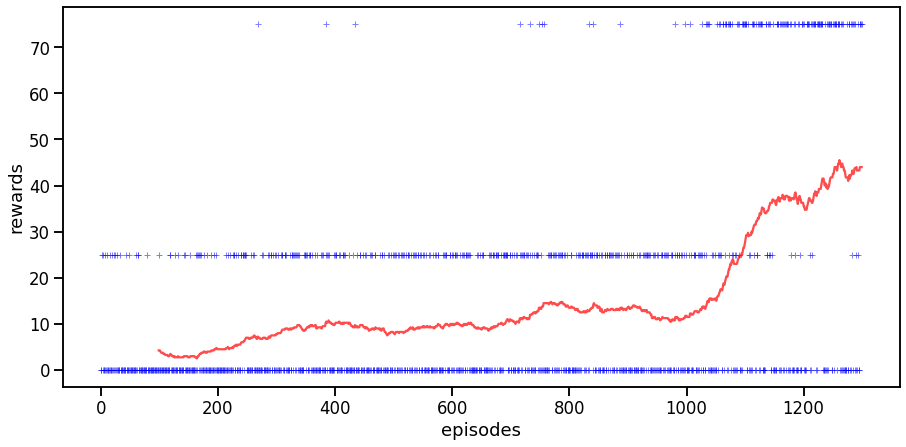

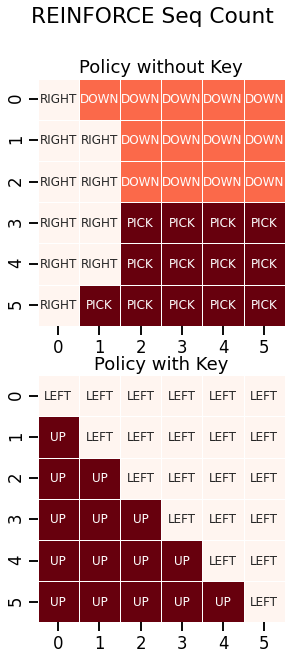

% of visited states: 100.0%


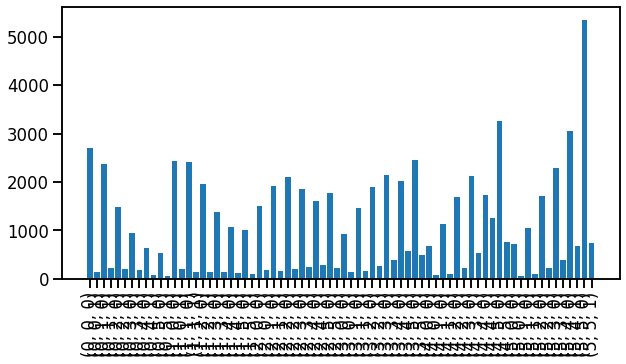

In [102]:
plot_scores(agent.scores)
agent.get_policy()
policy_display(env, agent.policy, "REINFORCE Seq Count")
plot_state_freq(agent.state_freq)
agent.get_proba()
agent.get_state_freq()

### Reinforce count staes + seq exploration

In [90]:
from reinforce_count_seq_states import train

In [91]:
agent = train(env, L, logs=logs)


****************************************************************************************************
TRAINING START


Iteration: 0
(0, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 0, 1) probas:  [0.19 0.2  0.23 0.19 0.19]
(0, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 1, 1) probas:  [0.19 0.2  0.23 0.19 0.19]
(0, 2, 0) probas:  [0.19 0.21 0.2  0.2  0.2 ]
(0, 2, 1) probas:  [0.19 0.2  0.23 0.19 0.19]
(0, 3, 0) probas:  [0.19 0.21 0.21 0.2  0.19]
(0, 3, 1) probas:  [0.19 0.2  0.23 0.18 0.19]
(0, 4, 0) probas:  [0.18 0.22 0.21 0.2  0.19]
(0, 4, 1) probas:  [0.19 0.21 0.23 0.18 0.19]
(0, 5, 0) probas:  [0.18 0.22 0.21 0.2  0.19]
(0, 5, 1) probas:  [0.18 0.21 0.24 0.18 0.19]
(1, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 0, 1) probas:  [0.19 0.2  0.23 0.19 0.2 ]
(1, 1, 0) probas:  [0.19 0.2  0.2  0.2  0.2 ]
(1, 1, 1) probas:  [0.19 0.2  0.23 0.19 0.2 ]
(1, 2, 0) probas:  [0.19 0.21 0.2  0.2  0.2 ]
(1, 2, 1) probas:  [0.19 0.2  0.23 0.18 0.2 ]
(1, 3, 0) probas:  [0.19 0.21 0.21 0.2  0.2 ]
(1, 3, 1)

Score: 25
% of visited states: 77.8%

Iteration: 52
Score: 0
% of visited states: 77.8%

Iteration: 53
Score: 25
% of visited states: 77.8%

Iteration: 54
Score: 0
% of visited states: 77.8%

Iteration: 55
Score: 0
% of visited states: 77.8%

Iteration: 56
Score: 0
% of visited states: 77.8%

Iteration: 57
Score: 25
% of visited states: 77.8%

Iteration: 58
Score: 0
% of visited states: 77.8%

Iteration: 59
Score: 25
% of visited states: 77.8%

Iteration: 60
Score: 0
% of visited states: 77.8%

Iteration: 61
Score: 0
% of visited states: 77.8%

Iteration: 62
Score: 0
% of visited states: 77.8%

Iteration: 63
Score: 0
% of visited states: 77.8%

Iteration: 64
Score: 25
% of visited states: 79.2%

Iteration: 65
Score: 0
% of visited states: 79.2%

Iteration: 66
Score: 0
% of visited states: 79.2%

Iteration: 67
Score: 0
% of visited states: 79.2%

Iteration: 68
Score: 0
% of visited states: 79.2%

Iteration: 69
Score: 0
% of visited states: 79.2%

Iteration: 70
Score: 25
% of visited sta

Score: 0
% of visited states: 80.6%

Iteration: 149
Score: 0
% of visited states: 80.6%

Iteration: 150
(0, 0, 0) probas:  [0.18 0.15 0.23 0.22 0.22]
(0, 0, 1) probas:  [0.17 0.15 0.25 0.2  0.22]
(0, 1, 0) probas:  [0.17 0.15 0.23 0.22 0.22]
(0, 1, 1) probas:  [0.17 0.15 0.25 0.2  0.23]
(0, 2, 0) probas:  [0.16 0.15 0.24 0.22 0.23]
(0, 2, 1) probas:  [0.17 0.15 0.25 0.2  0.23]
(0, 3, 0) probas:  [0.16 0.15 0.24 0.22 0.23]
(0, 3, 1) probas:  [0.16 0.15 0.26 0.2  0.23]
(0, 4, 0) probas:  [0.15 0.15 0.24 0.22 0.24]
(0, 4, 1) probas:  [0.16 0.15 0.26 0.2  0.24]
(0, 5, 0) probas:  [0.14 0.15 0.25 0.22 0.24]
(0, 5, 1) probas:  [0.15 0.14 0.26 0.2  0.24]
(1, 0, 0) probas:  [0.17 0.15 0.22 0.23 0.22]
(1, 0, 1) probas:  [0.17 0.15 0.25 0.2  0.23]
(1, 1, 0) probas:  [0.17 0.15 0.22 0.23 0.23]
(1, 1, 1) probas:  [0.17 0.15 0.25 0.2  0.23]
(1, 2, 0) probas:  [0.16 0.14 0.23 0.23 0.24]
(1, 2, 1) probas:  [0.17 0.15 0.25 0.2  0.24]
(1, 3, 0) probas:  [0.15 0.14 0.23 0.23 0.24]
(1, 3, 1) probas:  [0.

Score: 25
% of visited states: 84.7%

Iteration: 202
Score: 0
% of visited states: 84.7%

Iteration: 203
Score: 25
% of visited states: 84.7%

Iteration: 204
Score: 0
% of visited states: 84.7%

Iteration: 205
Score: 0
% of visited states: 84.7%

Iteration: 206
Score: 25
% of visited states: 84.7%

Iteration: 207
Score: 25
% of visited states: 84.7%

Iteration: 208
Score: 25
% of visited states: 84.7%

Iteration: 209
Score: 0
% of visited states: 84.7%

Iteration: 210
Score: 25
% of visited states: 88.9%

Iteration: 211
Score: 25
% of visited states: 88.9%

Iteration: 212
Score: 0
% of visited states: 88.9%

Iteration: 213
Score: 0
% of visited states: 88.9%

Iteration: 214
Score: 0
% of visited states: 88.9%

Iteration: 215
Score: 0
% of visited states: 88.9%

Iteration: 216
Score: 0
% of visited states: 88.9%

Iteration: 217
Score: 0
% of visited states: 88.9%

Iteration: 218
Score: 0
% of visited states: 88.9%

Iteration: 219
Score: 0
% of visited states: 88.9%

Iteration: 220
Score

Score: 0
% of visited states: 91.7%

Iteration: 297
Score: 25
% of visited states: 91.7%

Iteration: 298
Score: 0
% of visited states: 91.7%

Iteration: 299
Score: 0
% of visited states: 91.7%

Iteration: 300
(0, 0, 0) probas:  [0.15 0.16 0.23 0.23 0.22]
(0, 0, 1) probas:  [0.15 0.16 0.25 0.2  0.24]
(0, 1, 0) probas:  [0.15 0.16 0.23 0.23 0.24]
(0, 1, 1) probas:  [0.15 0.16 0.25 0.2  0.24]
(0, 2, 0) probas:  [0.14 0.16 0.24 0.22 0.25]
(0, 2, 1) probas:  [0.15 0.16 0.25 0.2  0.25]
(0, 3, 0) probas:  [0.13 0.16 0.24 0.22 0.26]
(0, 3, 1) probas:  [0.14 0.16 0.25 0.19 0.26]
(0, 4, 0) probas:  [0.12 0.16 0.24 0.21 0.27]
(0, 4, 1) probas:  [0.13 0.16 0.25 0.19 0.27]
(0, 5, 0) probas:  [0.11 0.16 0.24 0.2  0.28]
(0, 5, 1) probas:  [0.12 0.16 0.25 0.18 0.28]
(1, 0, 0) probas:  [0.15 0.15 0.22 0.24 0.23]
(1, 0, 1) probas:  [0.15 0.16 0.24 0.2  0.24]
(1, 1, 0) probas:  [0.14 0.15 0.22 0.23 0.25]
(1, 1, 1) probas:  [0.15 0.16 0.24 0.2  0.25]
(1, 2, 0) probas:  [0.13 0.15 0.23 0.22 0.27]
(1, 2, 1)

(5, 3, 0) probas:  [0.1  0.13 0.18 0.3  0.29]
(5, 3, 1) probas:  [0.1  0.15 0.21 0.27 0.27]
(5, 4, 0) probas:  [0.09 0.13 0.17 0.29 0.31]
(5, 4, 1) probas:  [0.09 0.15 0.2  0.27 0.29]
(5, 5, 0) probas:  [0.08 0.13 0.17 0.28 0.33]
(5, 5, 1) probas:  [0.09 0.14 0.2  0.27 0.3 ]
Score: 0
% of visited states: 91.7%

Iteration: 351
Score: 0
% of visited states: 91.7%

Iteration: 352
Score: 0
% of visited states: 91.7%

Iteration: 353
Score: 0
% of visited states: 91.7%

Iteration: 354
Score: 0
% of visited states: 91.7%

Iteration: 355
Score: 0
% of visited states: 91.7%

Iteration: 356
Score: 0
% of visited states: 91.7%

Iteration: 357
Score: 25
% of visited states: 91.7%

Iteration: 358
Score: 25
% of visited states: 91.7%

Iteration: 359
Score: 25
% of visited states: 91.7%

Iteration: 360
Score: 0
% of visited states: 91.7%

Iteration: 361
Score: 0
% of visited states: 91.7%

Iteration: 362
Score: 0
% of visited states: 91.7%

Iteration: 363
Score: 25
% of visited states: 91.7%

Iterati

Score: 0
% of visited states: 93.1%

Iteration: 440
Score: 0
% of visited states: 93.1%

Iteration: 441
Score: 0
% of visited states: 93.1%

Iteration: 442
Score: 0
% of visited states: 93.1%

Iteration: 443
Score: 0
% of visited states: 93.1%

Iteration: 444
Score: 25
% of visited states: 94.4%

Iteration: 445
Score: 25
% of visited states: 94.4%

Iteration: 446
Score: 25
% of visited states: 94.4%

Iteration: 447
Score: 0
% of visited states: 94.4%

Iteration: 448
Score: 25
% of visited states: 94.4%

Iteration: 449
Score: 0
% of visited states: 94.4%

Iteration: 450
(0, 0, 0) probas:  [0.14 0.13 0.22 0.26 0.25]
(0, 0, 1) probas:  [0.14 0.13 0.23 0.23 0.26]
(0, 1, 0) probas:  [0.13 0.13 0.22 0.25 0.27]
(0, 1, 1) probas:  [0.14 0.13 0.23 0.23 0.27]
(0, 2, 0) probas:  [0.12 0.13 0.22 0.24 0.29]
(0, 2, 1) probas:  [0.13 0.13 0.23 0.22 0.28]
(0, 3, 0) probas:  [0.11 0.13 0.22 0.24 0.31]
(0, 3, 1) probas:  [0.12 0.13 0.23 0.22 0.3 ]
(0, 4, 0) probas:  [0.1  0.13 0.21 0.23 0.33]
(0, 4, 1) 

Score: 25
% of visited states: 94.4%

Iteration: 502
Score: 25
% of visited states: 94.4%

Iteration: 503
Score: 0
% of visited states: 94.4%

Iteration: 504
Score: 25
% of visited states: 94.4%

Iteration: 505
Score: 25
% of visited states: 94.4%

Iteration: 506
Score: 0
% of visited states: 94.4%

Iteration: 507
Score: 25
% of visited states: 94.4%

Iteration: 508
Score: 25
% of visited states: 94.4%

Iteration: 509
Score: 0
% of visited states: 94.4%

Iteration: 510
Score: 25
% of visited states: 94.4%

Iteration: 511
Score: 0
% of visited states: 94.4%

Iteration: 512
Score: 0
% of visited states: 94.4%

Iteration: 513
Score: 25
% of visited states: 94.4%

Iteration: 514
Score: 25
% of visited states: 94.4%

Iteration: 515
Score: 0
% of visited states: 94.4%

Iteration: 516
Score: 0
% of visited states: 94.4%

Iteration: 517
Score: 0
% of visited states: 94.4%

Iteration: 518
Score: 25
% of visited states: 94.4%

Iteration: 519
Score: 0
% of visited states: 94.4%

Iteration: 520
Sc

Score: 0
% of visited states: 95.8%

Iteration: 597
Score: 25
% of visited states: 95.8%

Iteration: 598
Score: 0
% of visited states: 95.8%

Iteration: 599
Score: 0
% of visited states: 95.8%

Iteration: 600
(0, 0, 0) probas:  [0.12 0.14 0.24 0.3  0.2 ]
(0, 0, 1) probas:  [0.12 0.15 0.26 0.28 0.2 ]
(0, 1, 0) probas:  [0.11 0.15 0.25 0.29 0.21]
(0, 1, 1) probas:  [0.11 0.15 0.27 0.27 0.2 ]
(0, 2, 0) probas:  [0.1  0.15 0.25 0.28 0.22]
(0, 2, 1) probas:  [0.11 0.15 0.27 0.27 0.2 ]
(0, 3, 0) probas:  [0.09 0.16 0.25 0.27 0.22]
(0, 3, 1) probas:  [0.1  0.16 0.27 0.26 0.21]
(0, 4, 0) probas:  [0.08 0.17 0.25 0.27 0.23]
(0, 4, 1) probas:  [0.09 0.16 0.28 0.26 0.21]
(0, 5, 0) probas:  [0.08 0.18 0.25 0.26 0.24]
(0, 5, 1) probas:  [0.08 0.17 0.28 0.25 0.22]
(1, 0, 0) probas:  [0.11 0.13 0.23 0.31 0.21]
(1, 0, 1) probas:  [0.11 0.15 0.25 0.28 0.21]
(1, 1, 0) probas:  [0.1  0.14 0.23 0.3  0.23]
(1, 1, 1) probas:  [0.11 0.15 0.26 0.28 0.21]
(1, 2, 0) probas:  [0.09 0.15 0.23 0.29 0.24]
(1, 2, 1)

KeyboardInterrupt: 

In [ ]:
plot_scores(agent.scores)
agent.get_policy()
policy_display(env, agent.policy, "REINFORCE Seq Count")
plot_state_freq(agent.state_freq)
agent.get_proba()
agent.get_state_freq()